In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

import os
import glob
import random

In [3]:
read_path = glob.glob("SWED/train/images/*")
print(read_path[0])
len(read_path)

SWED/train/images/S2B_MSIL2A_20200207T113309_N0214_R080_T28PCA_20200207T132518_image_18_26.npy


28224

In [149]:
label_path = glob.glob("SWED/train/labels/*")
print(label_path[0])
len(label_path)

SWED/train/labels/S2A_MSIL2A_20190929T110841_N0208_R137_T30STF_20190929T114915_chip_25_31.npy


28240

In [4]:
img = np.load(read_path[0])
np.shape(img)

(256, 256, 12)

In [88]:
np.max(img[:, :, 1:4])

8934

In [11]:
# all images have 12 channels
n_channels = []
for path in tqdm_notebook(read_path):
    img = np.load(path)
    shape = np.shape(img)
    n_channels.append(shape[2])
print(min(n_channels), max(n_channels))

  0%|          | 0/28224 [00:00<?, ?it/s]

12 12


In [78]:
# All images are Level-2A product level
for path in read_path:
    product_level = path.split("_")[1]
    if product_level != 'MSIL2A':
        print(path)

In [5]:
def channel_filter(img,c=0):
    """Returns given channel from image"""
    img = np.array(img)
    c_img = img[:, :, c]

    return c_img

np.shape(channel_filter(img,5))

(256, 256)

In [6]:
def plot_channels(img):
    
    channels = ['Coastal Aerosol','Blue','Green',
                 'Red','Red Edge 1','Red Edge 2',
                'Red Edge 3','NIR','Red Edge 4',
                 'Water Vapour','SWIR 1','SWIR 2']

    fig, axs = plt.subplots(3,4,figsize=(15,10))

    index = 0
    for i in range(3):
        for j in range(4):
            c_img = channel_filter(img,c=index)

            axs[i,j].imshow(c_img,cmap='gray')
            axs[i,j].set_title(channels[index])
            axs[i,j].axis("off")

            index +=1

In [ ]:
https://gisgeography.com/sentinel-2-bands-combinations/
https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi/definitions
https://www.satmapper.hu/en/rgb-images/
https://forum.sentinel-hub.com/t/normalization-of-sentinel-data-for-ml-downstream/5459/4

SWED/train/images/S2B_MSIL2A_20200207T163439_N0214_R083_T16RBU_20200207T201114_image_34_27.npy


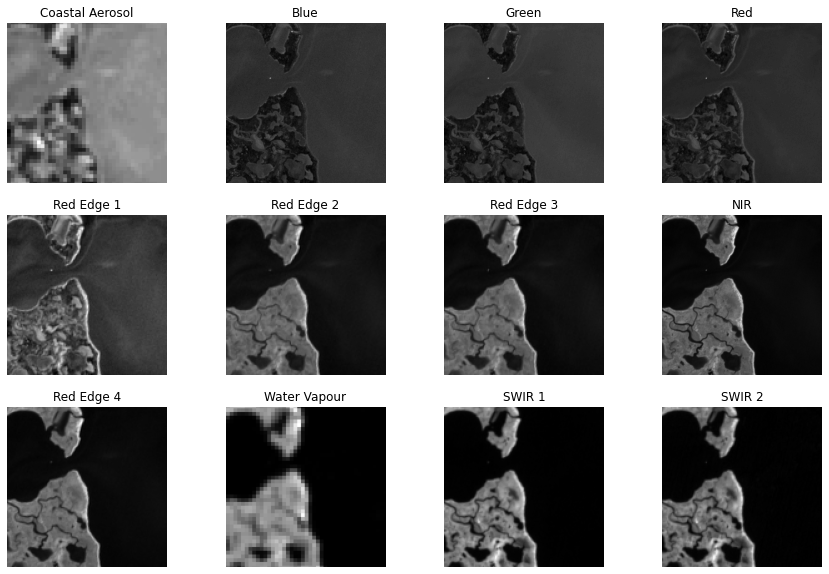

In [19]:
rint = random.randint(0, len(read_path))
path = read_path[rint]
print(path)

img = np.load(path)
plot_channels(img)

SWED/train/images/S2B_MSIL2A_20200207T163439_N0214_R083_T16RBU_20200207T201114_image_7_18.npy


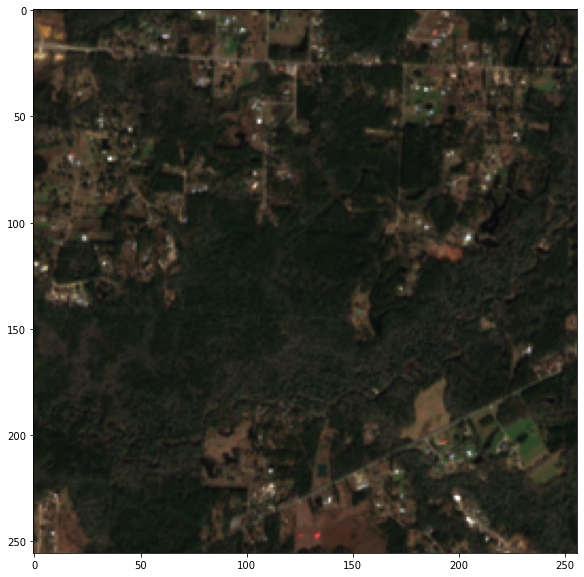

In [167]:
def get_rgb(img):
    rgb_img = img[:, :, [3,2,1]]
    rgb_normalize = np.clip(rgb_img/10000, 0, 0.3)/0.3
    
    return rgb_normalize

rint = random.randint(0, len(read_path))
path = read_path[rint]
print(path)
img = np.load(path)

rgb_img = get_rgb(img)

fig = plt.figure(figsize=(10,10))
plt.imshow(rgb_img)

In [83]:
np.max(img[:, :, [3,2,1]]/3558)

2.5109612141652615

In [ ]:
def plot_labels(path):
    

In [58]:
rgb_img = img[:, :, [3,2,1]]

SWED/train/images/S2B_MSIL2A_20200207T163439_N0214_R083_T16RBU_20200207T201114_image_21_15.npy
SWED/train/labels/S2B_MSIL2A_20200207T163439_N0214_R083_T16RBU_20200207T201114_chip_21_15.npy


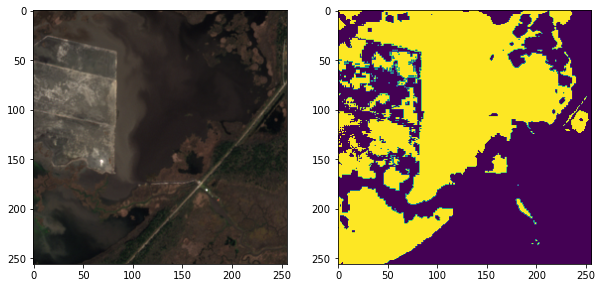

In [300]:
rint = random.randint(0, len(read_path))
path = read_path[rint]

label_path = path.replace("images","labels").replace("image","chip")
print(path)
print(label_path)

img = np.load(path)
rgb_img = get_rgb(img)
label = np.load(label_path)[0]

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(rgb_img)
axs[1].imshow(label)


In [31]:
np.max(img[:, :, [3,2,1]])

18776

In [34]:
print(np.max(img[:, :, [3,2,1]]))
print(np.max(img[:, :, 3]))
print(np.max(img[:, :, 2]))
print(np.max(img[:, :, 1]))

18776
18776
16473
9293


SWED/train/labels/S2A_MSIL2A_20190715T154911_N0213_R054_T18TWL_20190715T200600_chip_11_6.npy


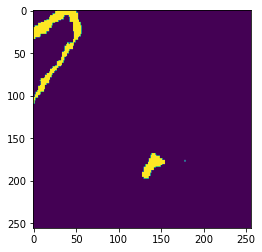

In [155]:
rint = random.randint(0, len(read_path))
path = label_path[rint]
print(path)

img = np.load(path)

np.shape(img)
plt.imshow(img[0])

In [46]:
np.min(img)

0

In [45]:
np.max(img)

0